<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [324]:
#Importation de la librairie Pandas
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [8]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')
#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")
#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [11]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [12]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [13]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [14]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] *= 1000

In [15]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={"Valeur": "Population"}, inplace=True)

In [16]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [18]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [19]:
#Consulter le nombre de colonnes
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [20]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [21]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)

In [22]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
colonnes_tonnes_tokg = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']

for elt in colonnes_tonnes_tokg:
    dispo_alimentaire[elt] *= 1000000

In [23]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [25]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [26]:
#Consulter le nombre de colonnes
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [27]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [28]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={"Pays bénéficiaire": "Zone"}, inplace=True)

In [29]:
aide_alimentaire.rename(columns={"Valeur": "Aide_Alimentaire"}, inplace=True)

In [30]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Aide_Alimentaire'] *= 1000

In [31]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Aide_Alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [33]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [34]:
#Consulter le nombre de colonnes
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [35]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [36]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)

sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

In [37]:
#Puis remplacement des NaN en 0
sous_nutrition.fillna(0, inplace=True)

In [38]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={"Valeur": "Sous_nutrition"}, inplace=True)

In [39]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['Sous_nutrition'] *= 1000000

In [40]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [42]:
sous_nutrition.head()

,Zone,Année,Sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [43]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

#convertir le dictionnaire en dataframe

sous_nutrition = pd.DataFrame(sous_nutrition)

#en ciblant l'année 2017

jointure_2017 = pd.merge(population.loc[population['Année'] == 2017,["Zone", "Population"]],
                               sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018',["Zone", "Sous_nutrition"]],
                               on='Zone')

In [282]:
#Affichage du dataset
jointure_2017.head()

,Zone,Population,Sous_nutrition,proportion,taux_sous_nutrition
0,Afghanistan,36296113.0,10500000.0,0.001392,28.928718
1,Afrique du Sud,57009756.0,3100000.0,0.000411,5.437666
2,Albanie,2884169.0,100000.0,0.000013,3.467203
3,Algérie,41389189.0,1300000.0,0.000172,3.140917
4,Allemagne,82658409.0,0.0,0.000000,0.000000


In [45]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
print("Proportion de personnes en état de sous nutrition :", "{:.2f}".format(jointure_2017['Sous_nutrition'].sum()*100/jointure_2017['Population'].sum()), "%")

Proportion de personnes en état de sous nutrition : 7.10 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [47]:
#Combien mange en moyenne un être humain ? Source => 

In [48]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population

dispo_alimentaire_avec_population = dispo_alimentaire.merge(population.loc[population['Année'] == 2017,["Zone", "Population"]],
                                            on='Zone')

In [49]:
#Affichage du nouveau dataframe
dispo_alimentaire_avec_population.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0


In [50]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
dispo_alimentaire_avec_population['dispo_kcal'] = dispo_alimentaire_avec_population['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alimentaire_avec_population['Population'] * 365
print("dispo alimentaire totale en kcal :", dispo_alimentaire_avec_population['dispo_kcal'].sum(), "kcal")

dispo alimentaire totale en kcal : 7635429388975815.0 kcal


In [51]:
#Calcul du nombre d'humains pouvant être nourris
total_h_kcal = round(dispo_alimentaire_avec_population['dispo_kcal'].sum()/(2250*365))
print("Total d'être humain pouvant être nourris :", total_h_kcal)
print("Proportion :", "{:.2f}".format(total_h_kcal*100/population.loc[population['Année'] == 2017,"Population"].sum()), "%")

Total d'être humain pouvant être nourris : 9297326501
Proportion : 123.17 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [53]:
dispo_alimentaire_avec_population.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0,6.624041e+10
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,5.299232e+10


In [54]:
#Transfert des données avec les végétaux dans un nouveau dataframe
vegetaux = dispo_alimentaire_avec_population.loc[dispo_alimentaire_avec_population['Origine'] == "vegetale",:]

In [55]:
vegetaux.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,5.299232e+10
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000000.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00


In [56]:
#Calcul du nombre de kcal disponible pour les végétaux
print("dispo alimentaire totale en kcal des produits végétaux :", vegetaux['dispo_kcal'].sum(), "kcal")

dispo alimentaire totale en kcal des produits végétaux : 6300178937197865.0 kcal


In [57]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
total_h_kcal = round(vegetaux['dispo_kcal'].sum()/(2250*365))
print("Total d'être humain pouvant être nourris :", total_h_kcal)
print("Proportion :", "{:.2f}".format(total_h_kcal*100/population.loc[population['Année'] == 2017,"Population"].sum()), "%")

Total d'être humain pouvant être nourris : 7671450761
Proportion : 101.63 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [59]:
#Calcul de la disponibilité totale
dispo_int = dispo_alimentaire['Disponibilité intérieure'].sum()
dispo_int

9848994000000.0

In [60]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
for elt in ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']:
    print("Proportion de", elt, ":", "{:.2f}".format(dispo_alimentaire[elt].sum()*100/dispo_int), "%")

Proportion de Aliments pour animaux : 13.24 %
Proportion de Pertes : 4.61 %
Proportion de Nourriture : 49.51 %
Proportion de Semences : 1.57 %
Proportion de Traitement : 22.38 %
Proportion de Autres Utilisations : 8.78 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [62]:
#Création d'une liste avec toutes les variables
liste_cereales = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle",
                  "Avoine", "Millet", "Sorgho", "Céréales, Autres"]

In [63]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
cereales = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(liste_cereales),:]

In [64]:
#Affichage de la proportion d'alimentation animale
print("Proportion d'alimentation animale :", "{:.2f}".format(cereales['Aliments pour animaux'].sum()*100/cereales['Disponibilité intérieure'].sum()), "%")

Proportion d'alimentation animale : 36.29 %


In [65]:
#Affichage de la proportion d'alimentation animale
print("Proportion d'alimentation humaine :", "{:.2f}".format(cereales['Nourriture'].sum()*100/cereales['Disponibilité intérieure'].sum()), "%")

Proportion d'alimentation humaine : 42.75 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [67]:
jointure_2017.head()

,Zone,Population,Sous_nutrition
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0


In [68]:
#Création de la colonne proportion par pays
jointure_2017['proportion'] = jointure_2017['Sous_nutrition']/(jointure_2017['Population'].sum())

In [69]:
#affichage après trie des 10 pires pays
dix_pires_pays = jointure_2017[['Zone', "proportion"]].sort_values(by="proportion", ascending=False).head(10)

In [176]:
dix_pires_pays

,Zone,proportion
84,Inde,0.025200
136,Pakistan,0.003287
85,Indonésie,0.003128
128,Nigéria,0.003022
16,Bangladesh,0.002850
61,Éthiopie,0.002797
144,Philippines,0.002081
158,République-Unie de Tanzanie,0.001776
157,République populaire démocratique de Corée,0.001591
96,Kenya,0.001577


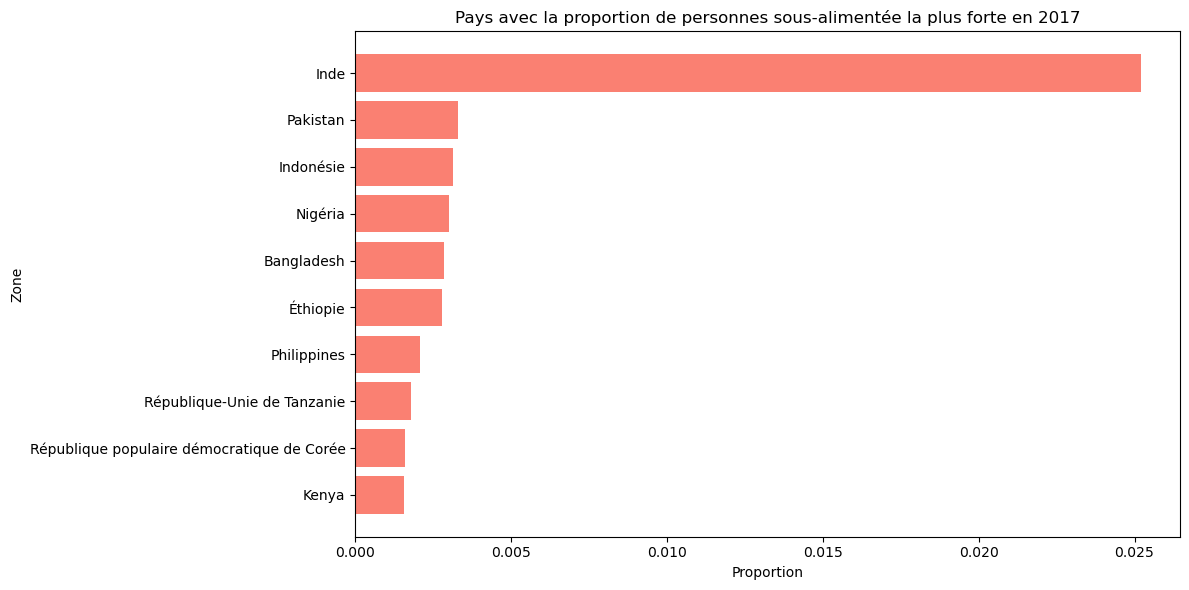

In [178]:
# Création du graphique

plt.figure(figsize=(12, 6))

plt.barh(dix_pires_pays["Zone"], dix_pires_pays["proportion"], color='salmon')



plt.title("Pays avec la proportion de personnes sous-alimentée la plus forte en 2017")

plt.xlabel("Proportion")

plt.ylabel("Zone")

plt.gca().invert_yaxis()  # Inverser l'ordre des zones pour afficher la plus grande proportion en haut

plt.tight_layout()

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [72]:
#calcul du total de l'aide alimentaire par pays
aide = aide_alimentaire[['Zone','Aide_Alimentaire']].groupby("Zone").sum().reset_index()

In [73]:
aide.columns

Index(['Zone', 'Aide_Alimentaire'], dtype='object')

In [168]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
dix_pays_trie = aide.sort_values(by="Aide_Alimentaire", ascending=False).head(10)

In [170]:
dix_pays_trie

,Zone,Aide_Alimentaire
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


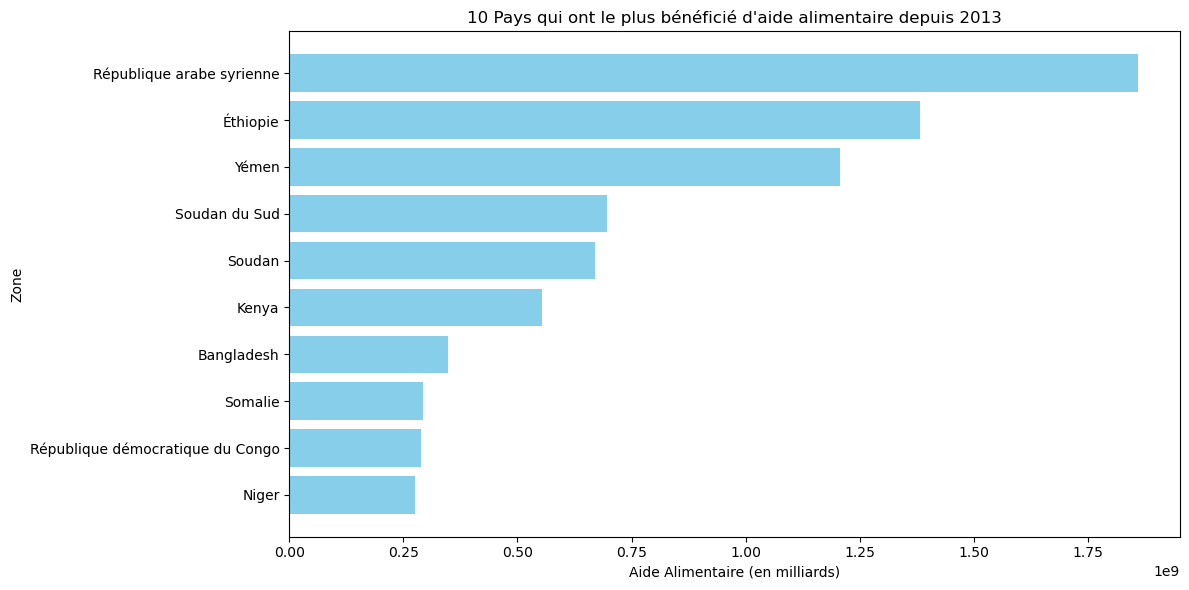

In [174]:
# Création du graphique

plt.figure(figsize=(12, 6))

plt.barh(dix_pays_trie["Zone"], dix_pays_trie["Aide_Alimentaire"], color='skyblue')



plt.title("10 Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013")

plt.xlabel("Aide Alimentaire (en milliards)")

plt.ylabel("Zone")

plt.gca().invert_yaxis()  # Inverser l'ordre des zones pour afficher le plus grand en haut

plt.tight_layout()

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [77]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
cinq_pays_aide = aide_alimentaire[['Zone', 'Année', 'Aide_Alimentaire']]
cinq_pays_aide = cinq_pays_aide.groupby(["Zone", "Année"]).sum().reset_index()

In [78]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste_pays = ["République arabe syrienne", "Éthiopie", "Yémen", "Soudan du Sud", "Soudan"]

In [79]:
#On filtre sur le dataframe avec notre liste
cinq_pays_aide = cinq_pays_aide.loc[cinq_pays_aide['Zone'].isin(liste_pays),:]

In [80]:
# Affichage des pays avec l'aide alimentaire par année
cinq_pays_aide

,Zone,Année,Aide_Alimentaire
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


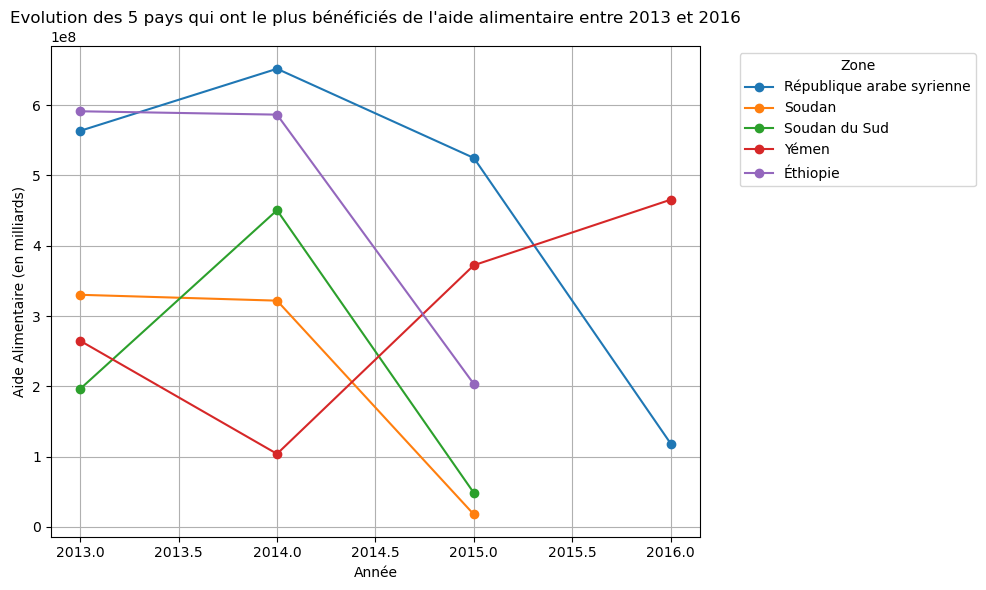

In [164]:
# Création du graphique

plt.figure(figsize=(10, 6))

for zone in cinq_pays_aide["Zone"].unique():

    subset = cinq_pays_aide[cinq_pays_aide["Zone"] == zone]

    plt.plot(subset["Année"], subset["Aide_Alimentaire"], marker="o", label=zone)



plt.title("Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016")

plt.xlabel("Année")

plt.ylabel("Aide Alimentaire (en milliards)")

plt.legend(title="Zone", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.grid(True)

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [188]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_pays_total = dispo_alimentaire[['Zone','Produit','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum().reset_index()

In [236]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
dispo_pays_total.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=True).head(10)

,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,"Abats ComestibleAlcool, non ComestibleAliments...",1879.0
166,Zambie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1924.0
91,Madagascar,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2056.0
0,Afghanistan,"Abats ComestibleAgrumes, AutresAliments pour e...",2087.0
65,Haïti,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2089.0
133,République populaire démocratique de Corée,Abats ComestibleAnimaux Aquatiques AutreAvoine...,2093.0
151,Tchad,"Abats ComestibleAlcool, non ComestibleAliments...",2109.0
167,Zimbabwe,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2113.0
114,Ouganda,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2126.0
154,Timor-Leste,Abats ComestibleAliments pour enfantsAnanasAni...,2129.0


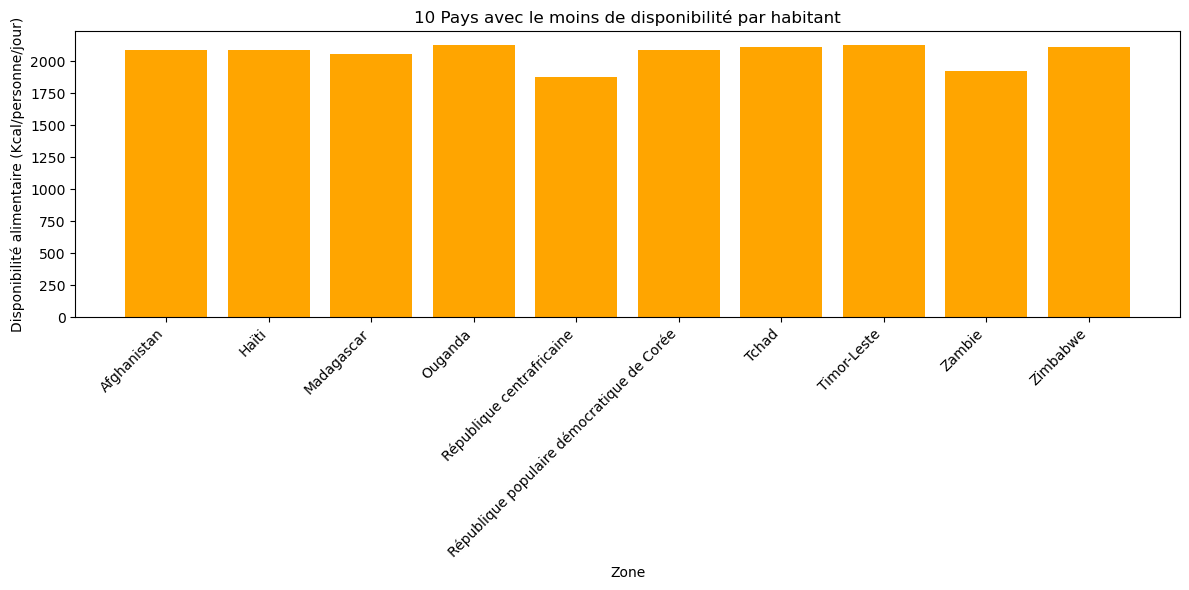

In [244]:
# Liste des zones spécifiques
zones_specifiques_1 = [
    "République centrafricaine", "Zambie", "Madagascar", "Afghanistan", "Haïti",
    "République populaire démocratique de Corée", "Tchad", "Zimbabwe", "Ouganda", "Timor-Leste"
]

# Filtrer les données pour ces zones
filtered_data = dispo_pays_total[dispo_pays_total["Zone"].isin(zones_specifiques_1)]

# Création du graphique
plt.figure(figsize=(12, 6))
plt.bar(filtered_data["Zone"], filtered_data["Disponibilité alimentaire (Kcal/personne/jour)"], color='orange')

plt.title("10 Pays avec le moins de disponibilité par habitant")
plt.xlabel("Zone")
plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)")
plt.xticks(rotation=45, ha="right")  # Rotation des labels pour plus de lisibilité
plt.tight_layout()
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [224]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
dispo_pays_total.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=False).head(10)

,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3770.0
16,Belgique,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3737.0
159,Turquie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3708.0
171,États-Unis d'Amérique,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3682.0
74,Israël,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3610.0
72,Irlande,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3602.0
75,Italie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3578.0
89,Luxembourg,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3540.0
168,Égypte,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3518.0
4,Allemagne,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3503.0


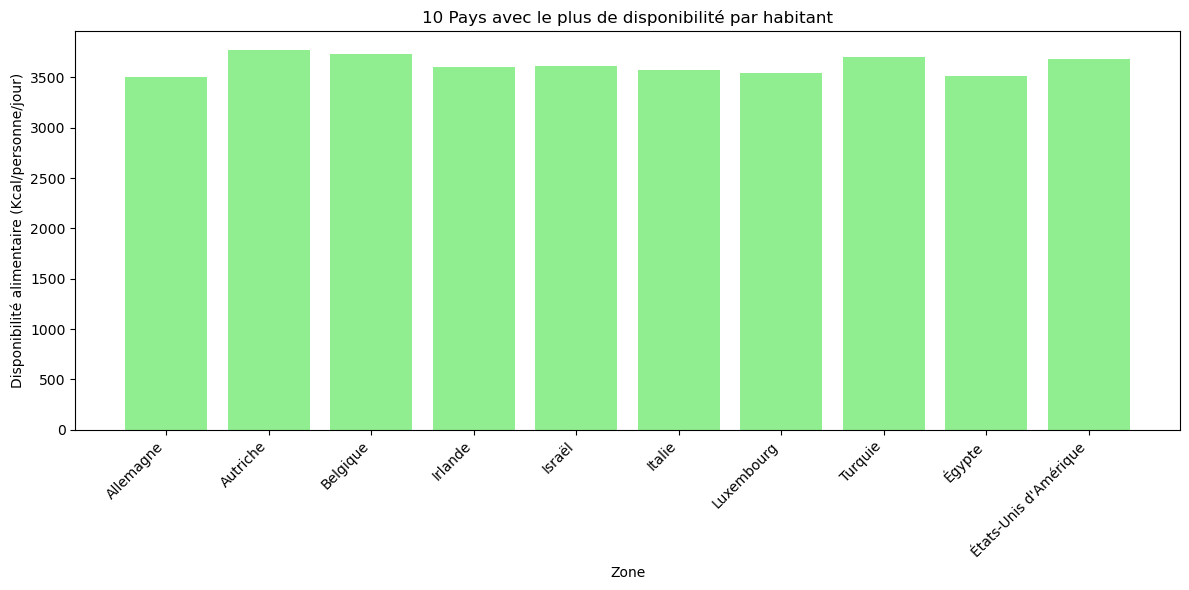

In [234]:
zones_specifiques = [
    "Autriche", "Belgique", "Turquie", "États-Unis d'Amérique", "Israël",
    "Irlande", "Italie", "Luxembourg", "Égypte", "Allemagne"
]

# Filtrer les données
filtered_data = dispo_pays_total[dispo_pays_total["Zone"].isin(zones_specifiques)]

# Création du graphique
plt.figure(figsize=(12, 6))
plt.bar(filtered_data["Zone"], filtered_data["Disponibilité alimentaire (Kcal/personne/jour)"], color='lightgreen')

plt.title("10 Pays avec le plus de disponibilité par habitant")
plt.xlabel("Zone")
plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)")
plt.xticks(rotation=45, ha="right")  # Rotation des labels pour plus de lisibilité
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [89]:
#création d'un dataframe avec uniquement la Thaïlande 
sous_nutrition_thailande = sous_nutrition[sous_nutrition['Zone'] == 'Thaïlande']
population_thailande = population[population['Zone'] == 'Thaïlande']

In [90]:
#Calcul de la sous nutrition en Thaïlande
print('Proportion en sous nutrition en Thaïlande :', "{:.2f}".format(sous_nutrition_thailande['Sous_nutrition'].iloc[0]*100/population_thailande['Population'].iloc[0]), "%")

Proportion en sous nutrition en Thaïlande : 9.10 %


In [91]:
# On calcule la proportion exportée en fonction de la proportion
thai_manioc = dispo_alimentaire.loc[(dispo_alimentaire['Produit'] == "Manioc") & (dispo_alimentaire['Zone'] == "Thaïlande"),:]
print('Proportion de manioc exportée :', "{:.2f}".format(thai_manioc['Exportations - Quantité'].iloc[0]*100 /
                                                                     thai_manioc['Production'].iloc[0]), "%")

Proportion de manioc exportée : 83.41 %


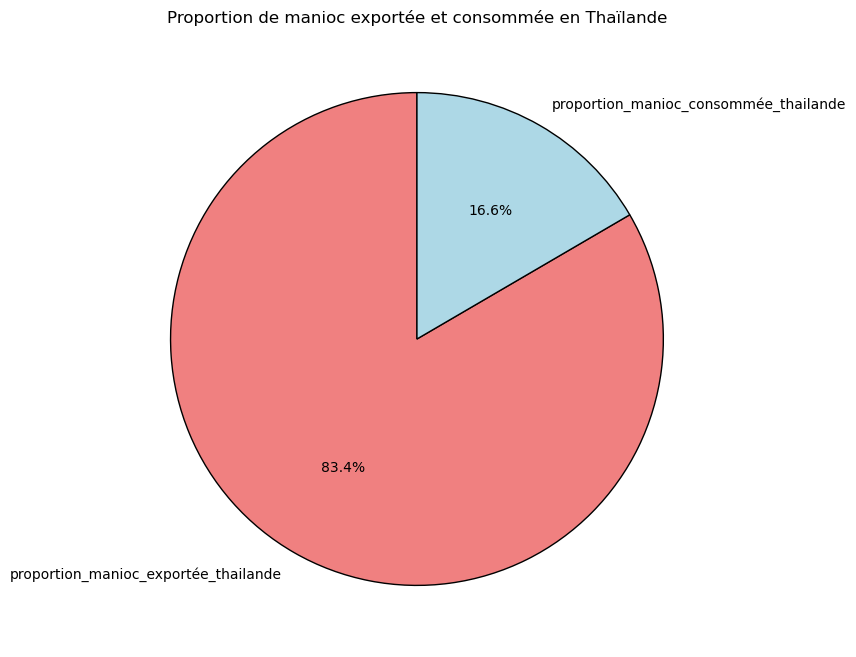

In [260]:
# Création du graphique

# Données
proportion_manioc_exportée_thailande = 83.41  # Proportion exportée (en %)
proportion_manioc_consommée_thailande = 100 - proportion_manioc_exportée_thailande  # Proportion restante (en %)

# Création du graphique
labels = ["proportion_manioc_exportée_thailande", "proportion_manioc_consommée_thailande"]
sizes = [proportion_manioc_exportée_thailande, proportion_manioc_consommée_thailande]
colors = ["lightcoral", "lightblue"]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={"edgecolor": "black"})
plt.title("Proportion de manioc exportée et consommée en Thaïlande")
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [294]:
nutri_annee = pd.merge(sous_nutrition, population, on='Zone', how='inner')

In [298]:
nutri_annee.drop(columns=['Année_x'], inplace=True)

In [314]:
nutri_annee.rename(columns={'Année_y': 'Année'}, inplace=True)

In [316]:
popu_nutri = pd.merge(nutri_annee, dispo_alimentaire, on='Zone', how='inner')

In [334]:
popu_nutri.head()

,Zone,Sous_nutrition,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,taux_sous_nutrition
0,Afghanistan,8600000.0,2013,32269589.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,...,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,26.650479
1,Afghanistan,8600000.0,2013,32269589.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,26.650479
2,Afghanistan,8600000.0,2013,32269589.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,26.650479
3,Afghanistan,8600000.0,2013,32269589.0,Ananas,vegetale,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.650479
4,Afghanistan,8600000.0,2013,32269589.0,Bananes,vegetale,0.0,0.0,4.0,2.70,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,26.650479


Nombre de pays en 2015 : 92496
Top 10 des pays les plus en difficulté alimentaire en 2015 :
                                              Zone  taux_sous_nutrition
229890                                       Haïti            47.683418
443894  République populaire démocratique de Corée            40.899255
505694                                       Tchad            34.724744
303734                                     Libéria            33.540314
511718                                 Timor-Leste            33.436373
316336                                  Madagascar            31.360784
477346                                Sierra Leone            30.675214
128302                                       Congo            28.829749
15820                                       Angola            27.255402
446160                 République-Unie de Tanzanie            26.222435


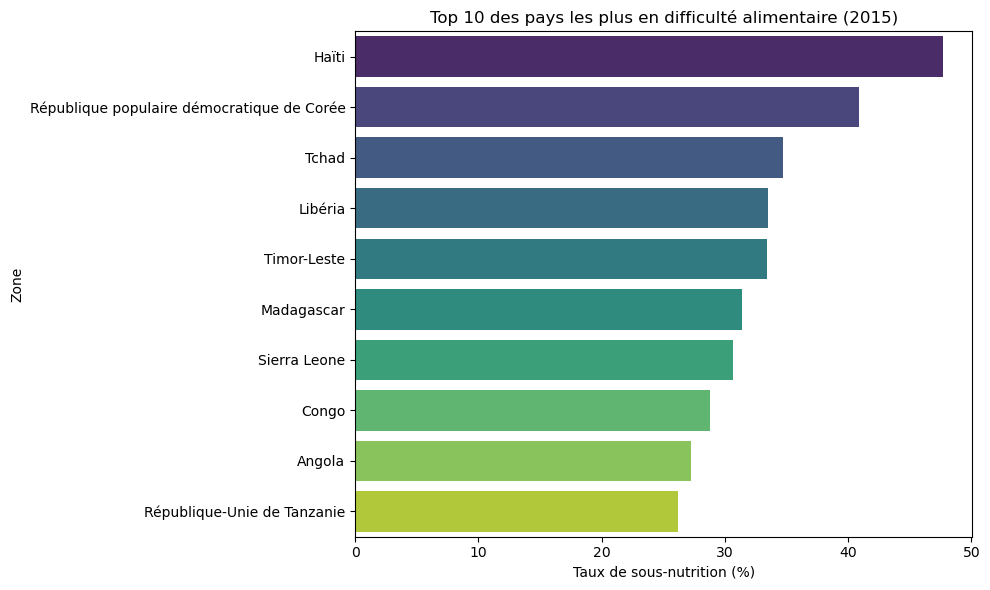

In [340]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

# Calculer le taux de sous-nutrition
popu_nutri['taux_sous_nutrition'] = popu_nutri['Sous_nutrition'] / popu_nutri['Population'] * 100  # Taux en %

# Filtrer les données pour l'année 2015
pays_2015 = popu_nutri[popu_nutri['Année'] == 2015]

# Vérifier le nombre de pays en 2015
print(f"Nombre de pays en 2015 : {pays_2015.shape[0]}")

# Suppression des doublons sur la colonne 'Zone' (si nécessaire)
pays_2015_unique = pays_2015.drop_duplicates(subset=['Zone'])

# Trier les pays par taux de sous-nutrition, du plus élevé au plus bas
pays_2015_sorted = pays_2015_unique.sort_values(by='taux_sous_nutrition', ascending=False)

# Sélectionner les 10 premiers pays
top_10_pays_difficultés = pays_2015_sorted[['Zone', 'taux_sous_nutrition']].head(10)

# Afficher les résultats
print("Top 10 des pays les plus en difficulté alimentaire en 2015 :")
print(top_10_pays_difficultés)

# Créer un graphique pour visualiser ces pays
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_pays_difficultés, x='taux_sous_nutrition', y='Zone', hue='Zone', palette='viridis', legend=False)
plt.title("Top 10 des pays les plus en difficulté alimentaire (2015)")
plt.xlabel("Taux de sous-nutrition (%)")
plt.ylabel("Zone")
plt.tight_layout()
plt.show()